**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

Data:

Exercises 1-10: congressional votes Congressional Voting Records Dataset

Exercise 11: movie data

Exercise 12: breast cancer surgery Haberman Survival Dataset

Data – Congressional Votes

Download the congressional votes data from here:Congressional Voting Records Dataset

These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984.

Read the description of the fields and download the data: house-votes-84.data

We will try to see if we can predict the house members' party based on their votes.

We will also use some of the general machine learning tools we learned (a bit more efficiently this time).

Exercise 5.1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("house-votes-84.data.txt",na_values=['?'], header=None)

In [3]:
df.columns = ["Class-Name", "handicapped-infants", "water-project-cost-sharing", 
              "adoption-of-the-budget-resolution", "physician-fee-freeze", "el-salvador-aid",
             "religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras",
             "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending",
             "superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa"]

In [4]:
df= df.replace(to_replace='y', value=float(1))
df= df.replace(to_replace='n', value=float(0))

In [5]:
df2=df.iloc[:,1:]

In [6]:
df2.apply(lambda x: x.fillna(x.mean(), inplace=True), axis=0)

handicapped-infants                       None
water-project-cost-sharing                None
adoption-of-the-budget-resolution         None
physician-fee-freeze                      None
el-salvador-aid                           None
religious-groups-in-schools               None
anti-satellite-test-ban                   None
aid-to-nicaraguan-contras                 None
mx-missile                                None
immigration                               None
synfuels-corporation-cutback              None
education-spending                        None
superfund-right-to-sue                    None
crime                                     None
duty-free-exports                         None
export-administration-act-south-africa    None
dtype: object

In [7]:
df3=df.iloc[:,0]

In [8]:
df4 = pd.concat([df3, df2], axis=1)

In [9]:
df4

,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


Exercise 5.2

Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [10]:
from sklearn.cross_validation import train_test_split

/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
y=df4.iloc[:,0]
X=df4.iloc[:,1:]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

Exercise 5.3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier  
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k  

You can use this to calculate accuracy:  

from sklearn.metrics import accuracy_score  

Which k value gives the highest accuracy?

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(range(1,21))
scoreknn=[]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    scoreknn.append(metrics.accuracy_score(y_test, y_pred_test))
print (scoreknn)

[0.9007633587786259, 0.89312977099236646, 0.9007633587786259, 0.9007633587786259, 0.91603053435114501, 0.93129770992366412, 0.91603053435114501, 0.92366412213740456, 0.93129770992366412, 0.93129770992366412, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.92366412213740456, 0.91603053435114501, 0.91603053435114501, 0.91603053435114501]


In [14]:
m = max(scoreknn)
[i for i, j in enumerate(scoreknn) if j == m]

[5, 8, 9]

k=6, k=9, k=10 gives the highest accuracy.

Exercise 5.4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [15]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)
logscore=metrics.accuracy_score(y_test, y_pred_test)
logscore

0.93893129770992367

In [16]:
k_range = list(range(1,21))
scorelog=[]
for i in k_range:
    scorelog.append(logscore)
print (scorelog)

[0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367, 0.93893129770992367]


Exercise 5.5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

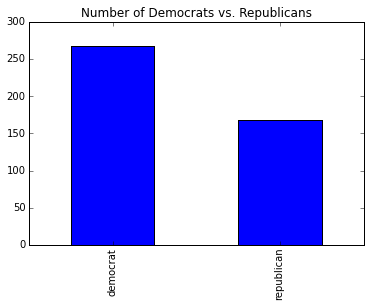

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
df["Class-Name"].value_counts().plot('bar', title= "Number of Democrats vs. Republicans")

In [18]:
df["Class-Name"].value_counts()

democrat      267
republican    168
Name: Class-Name, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
def pred_dem(X):
    return ['democrat' for x in range(len(X))]
def pred_rep(X):
    return ['republican' for x in range(len(X))]
y_pred = pred_dem(X_test)
ScoreD = metrics.accuracy_score(y_test,y_pred)
y_pred = pred_rep(X_test)
ScoreR = metrics.accuracy_score(y_test,y_pred)
print('All Predictions Democrat Accuracy Score:',ScoreD,'All Predictions Republican Accuracy Score',ScoreR)

('All Predictions Democrat Accuracy Score:', 0.58778625954198471, 'All Predictions Republican Accuracy Score', 0.41221374045801529)


In [20]:
k_range = list(range(1,21))
scoreDem=[]
for i in k_range:
    scoreDem.append(ScoreD)

In [21]:
k_range = list(range(1,21))
scoreRep=[]
for i in k_range:
    scoreRep.append(ScoreR)

Exercise 5.6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

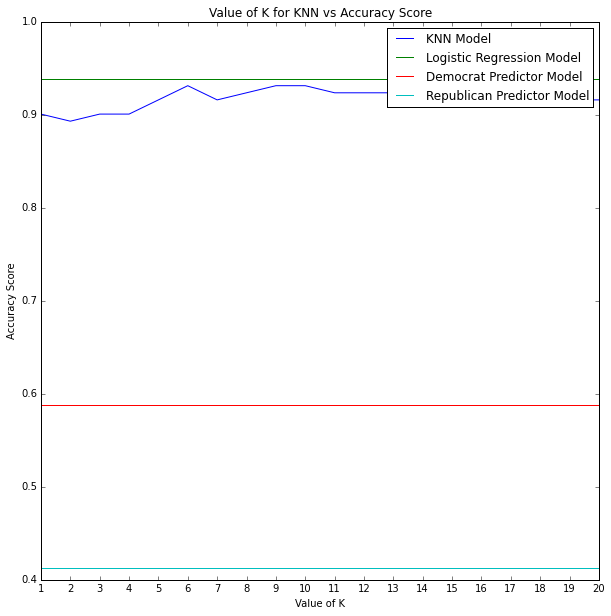

In [22]:

plt.figure(figsize=(10,10))
plt.plot(k_range,scoreknn)
plt.plot(k_range,scorelog)
plt.plot(k_range,scoreDem)
plt.plot(k_range,scoreRep)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
plt.title('Value of K for KNN vs Accuracy Score')
plt.xlim(1,20)
plt.xticks(list(range(1,21)))
plt.legend(["KNN Model", "Logistic Regression Model", "Democrat Predictor Model", "Republican Predictor Model"])


Exercise 5.7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:  

from sklearn.learning_curve import learning_curve  

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:  

train_cv_err = np.mean(train_err, axis=1)  
test_cv_err = np.mean(ts_err, axis=1)  

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).  

Draw the learning curve for KNN with the best k value as well.  

/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


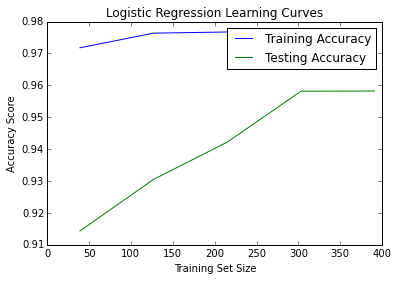

In [23]:
import numpy as np
from sklearn.learning_curve import learning_curve
m, train_err, test_err = learning_curve(LogisticRegression(), X, y, cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.title('Logistic Regression Learning Curves')

In [24]:
from sklearn.grid_search import GridSearchCV
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)
grid.grid_scores_

/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


[mean: 0.92644, std: 0.07053, params: {'n_neighbors': 1},
 mean: 0.93563, std: 0.04755, params: {'n_neighbors': 2},
 mean: 0.93563, std: 0.04962, params: {'n_neighbors': 3},
 mean: 0.94023, std: 0.04629, params: {'n_neighbors': 4},
 mean: 0.92874, std: 0.05409, params: {'n_neighbors': 5},
 mean: 0.93563, std: 0.04159, params: {'n_neighbors': 6},
 mean: 0.93103, std: 0.04859, params: {'n_neighbors': 7},
 mean: 0.93563, std: 0.04740, params: {'n_neighbors': 8},
 mean: 0.93333, std: 0.04858, params: {'n_neighbors': 9},
 mean: 0.93333, std: 0.04412, params: {'n_neighbors': 10},
 mean: 0.92874, std: 0.04847, params: {'n_neighbors': 11},
 mean: 0.93103, std: 0.04910, params: {'n_neighbors': 12},
 mean: 0.92644, std: 0.05429, params: {'n_neighbors': 13},
 mean: 0.92644, std: 0.05341, params: {'n_neighbors': 14},
 mean: 0.92644, std: 0.05429, params: {'n_neighbors': 15},
 mean: 0.93103, std: 0.05457, params: {'n_neighbors': 16},
 mean: 0.92644, std: 0.05944, params: {'n_neighbors': 17},
 mean:

In [25]:
grid.best_score_

0.9402298850574713

In [26]:
grid.best_params_

{'n_neighbors': 4}

In [27]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

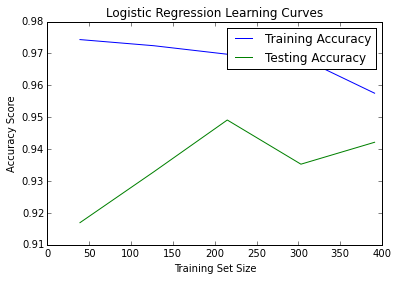

In [28]:
m, train_err, test_err = learning_curve(KNeighborsClassifier(n_neighbors=4), X, y, cv=10)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.title('Logistic Regression Learning Curves')

Exercise 5.8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

In [29]:
from __future__ import print_function, division
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=GaussianNB()
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
score= metrics.accuracy_score(y_test, y_pred_test)
print ('Gaussian: ', score)

Gaussian:  0.93893129771


In [30]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=SVC()
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
score= metrics.accuracy_score(y_test, y_pred_test)
print ('SVC: ', score)

SVC:  0.954198473282


In [31]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=DecisionTreeClassifier()
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
score= metrics.accuracy_score(y_test, y_pred_test)
print ('DecisionTreeClassifier: ', score)

DecisionTreeClassifier:  0.946564885496


In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
alg=RandomForestClassifier()
alg.fit(X_train, y_train)
y_pred_test = alg.predict(X_test)
score= metrics.accuracy_score(y_test, y_pred_test)
print ('RandomForestClassifier: ', score)

RandomForestClassifier:  0.954198473282


Exercise 5.9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score  

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [33]:
from sklearn.cross_validation import cross_val_score
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10, scoring='accuracy'))
print('Logistic Regression CV:',score)

Logistic Regression CV: 0.958227625088


In [34]:
score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=4), X, y, cv=10, scoring='accuracy'))
print('KNN CV:',score)

KNN CV: 0.939773985704


In [35]:
score = np.mean(cross_val_score(GaussianNB(), X, y, cv=10, scoring='accuracy'))
print('Gaussian CV:',score)

Gaussian CV: 0.939773985704


In [36]:
score = np.mean(cross_val_score(SVC(), X, y, cv=10, scoring='accuracy'))
print('SVC CV:',score)

SVC CV: 0.958280479211


In [37]:
score = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))
print('Decision Tree CV:',score)

Decision Tree CV: 0.928362528944


In [38]:
score = np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='accuracy'))
print('Random Forest:',score)

Random Forest: 0.963042383973


Exercise 5.10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [39]:
df=pd.read_csv("house-votes-84.data.txt",na_values=['?'], header=None)

In [40]:
df.columns = ["Class-Name", "handicapped-infants", "water-project-cost-sharing", 
              "adoption-of-the-budget-resolution", "physician-fee-freeze", "el-salvador-aid",
             "religious-groups-in-schools", "anti-satellite-test-ban", "aid-to-nicaraguan-contras",
             "mx-missile", "immigration", "synfuels-corporation-cutback", "education-spending",
             "superfund-right-to-sue", "crime", "duty-free-exports", "export-administration-act-south-africa"]

In [41]:
df= df.replace(to_replace='y', value=float(1))
df= df.replace(to_replace='n', value=float(0))

In [42]:
df.head()

,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [43]:
df2=df.iloc[:,1:]
df2.apply(lambda x: x.fillna(x.mode()[0], inplace=True), axis=0)

handicapped-infants                       None
water-project-cost-sharing                None
adoption-of-the-budget-resolution         None
physician-fee-freeze                      None
el-salvador-aid                           None
religious-groups-in-schools               None
anti-satellite-test-ban                   None
aid-to-nicaraguan-contras                 None
mx-missile                                None
immigration                               None
synfuels-corporation-cutback              None
education-spending                        None
superfund-right-to-sue                    None
crime                                     None
duty-free-exports                         None
export-administration-act-south-africa    None
dtype: object

In [44]:
df2.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [45]:
X = df2.iloc[:,2:]
y = df2.iloc[:,1]
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10, scoring='accuracy'))
print('Logistic Regression CV:',score)

Logistic Regression CV: 0.622964529011


In [46]:
from sklearn.grid_search import GridSearchCV
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)
grid.best_params_

{'n_neighbors': 13}

In [47]:
grid.best_score_

0.6298850574712643

In [48]:
score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=13), X, y, cv=10, scoring='accuracy'))
print('KNN CV:',score)

KNN CV: 0.62983321588


Exercise 5.11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [49]:
df = pd.read_csv("2013_movies.csv")

In [50]:
df=df[["Rating", "Runtime","DomesticTotalGross"]]

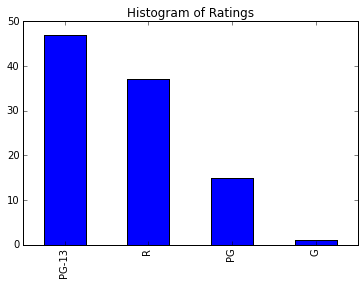

In [51]:
df["Rating"].value_counts().plot('bar', title= "Histogram of Ratings")

In [52]:
df.dropna()

,Rating,Runtime,DomesticTotalGross
0,PG-13,146,424668047
1,PG-13,129,409013994
2,PG,108,400738009
3,PG,98,368061265
4,PG-13,143,291045518
5,PG-13,91,274092705
6,G,107,268492764
7,PG-13,161,258366855
8,PG-13,130,238679850
9,PG,127,234911825


In [53]:
df.dtypes

Rating                object
Runtime                int64
DomesticTotalGross     int64
dtype: object

In [54]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10, scoring='accuracy'))
print('Logistic Regression CV:',score)

Logistic Regression CV: 0.473484848485


/Users/rebeccahyde/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:532: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [55]:
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X,y)
grid.best_params_

{'n_neighbors': 30}

In [56]:
score = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=30), X, y, cv=10, scoring='accuracy'))
print('KNN CV:',score)

KNN CV: 0.488484848485


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
def pred_rating(X):
    return ['PG-13' for x in range(len(X))]
y_pred = pred_rating(X_test)
ScoreR = metrics.accuracy_score(y_test,y_pred)
print('All Predictions PG-13 Accuracy Score:', ScoreR)

All Predictions PG-13 Accuracy Score: 0.466666666667


The KNN and Logistic Regression accuracy scores are not any better than the "predict PG-13 for every movie" accuracy score.

In [58]:
lr=LogisticRegression()
fit = lr.fit(X,y)
fit.coef_

array([[ -2.67922080e-13,  -4.73607165e-08],
       [ -4.22409750e-14,  -1.03876992e-08],
       [ -7.22558926e-16,   4.71945999e-10],
       [ -1.25224250e-15,  -7.03183167e-09]])

There are no features that affect any of the 4 outcomes. Hence the fact that predicting PG-13 for every movie has the same accuracy score as logistic regression.

Exercise 5.12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset

What is the average and standard deviation of the age of all of the patients?
What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?
Use logistic regression to predict survival after 5 years. How well does your model do?
What are the coefficients of logistic regression? Which features affect the outcome how?
Draw the learning curve for logistic regression in this case.

In [59]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", header=None)

In [60]:
df.columns = ["Age_at_op", "Year_of_op", "#_of_pos_aux_nodes", 
              "Survival_status"]

What is the average and standard deviation of the age of all of the patients?

In [61]:
print('Mean:',df['Age_at_op'].mean(),'Standard Deviation',df['Age_at_op'].std())

Mean: 52.4575163399 Standard Deviation 10.8034523493


What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [62]:
print('Mean:',df.loc[df['Survival_status']==1,'Age_at_op'].mean(),'Standard Deviation',df.loc[df['Survival_status']==1,'Age_at_op'].std())

Mean: 52.0177777778 Standard Deviation 11.0121541799


What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [63]:
print('Mean:',df.loc[df['Survival_status']==2,'Age_at_op'].mean(),'Standard Deviation',df.loc[df['Survival_status']==2,'Age_at_op'].std())

Mean: 53.6790123457 Standard Deviation 10.1671372083


Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

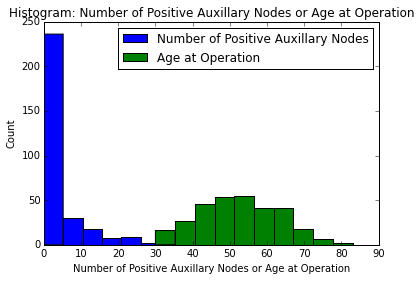

In [64]:
plt.hist(df["#_of_pos_aux_nodes"])
plt.hist(df["Age_at_op"])
plt.ylabel("Count")
plt.xlabel("Number of Positive Auxillary Nodes or Age at Operation")
plt.title("Histogram: Number of Positive Auxillary Nodes or Age at Operation")
plt.legend(["Number of Positive Auxillary Nodes", "Age at Operation"])

What is the earliest year of surgery in this dataset?

In [65]:
print ("Earliest year: ", "19"+str(df["Year_of_op"].min()))

Earliest year:  1958


What is the most recent year of surgery?

In [66]:
print ("Most recent year: ", "19"+str(df["Year_of_op"].max()))

Most recent year:  1969


Use logistic regression to predict survival after 5 years. How well does your model do?

In [67]:
X=df.iloc[:,0:3]
y=df.iloc[:,3]
y[y==2]=0

In [68]:
y.value_counts()

1    225
0     81
Name: Survival_status, dtype: int64

In [69]:
score = np.mean(cross_val_score(LogisticRegression(), X, y, cv=10, scoring='accuracy'))
print('Logistic Regression CV:',score)

Logistic Regression CV: 0.751659946237


What are the coefficients of logistic regression? Which features affect the outcome how?

In [74]:
lr = LogisticRegression()
fit = lr.fit(X,y)
fit.coef_

array([[-0.01854689,  0.0345458 , -0.08812314]])

Older age at operation and greater number of positive auxillary nodes decreases probability of survival >5 years.  Having surgery in a later year increases probability of survival >5 years.

Draw the learning curve for logistic regression in this case.

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

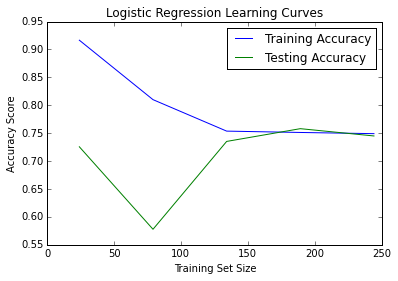

In [72]:
m, train_err, test_err = learning_curve(LogisticRegression(), X, y, cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err, axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.ylabel('Accuracy Score')
plt.xlabel('Training Set Size')
plt.legend(['Training Accuracy','Testing Accuracy'])
plt.title('Logistic Regression Learning Curves')